In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Preparación de datos
# ==============================================================================

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Preprocesado y modelado
# ==============================================================================


#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



#Creación de modelo
from sklearn.linear_model import LogisticRegression


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from manny_library import multiple_plot, plot_roc_curve

In [2]:
raw_data = pd.read_excel('estados_financieros_cuentas_principales_diciembre_2024.xlsx', sheet_name='Variables del modelo')
raw_data = raw_data.drop(index=0)

In [3]:
raw_data = raw_data.drop(['NIT', 'SIGLA', 'ENTIDAD'], axis=1)
raw_data

,TIPO ENTIDAD,CIIU,ACTIVIDAD ECONOMICA,DEPARTAMENTO,MUNICIPIO,NIVEL DE SUPERVISION,ASOCIADOS,EXCEDENTES Y/O PÉRDIDAS DEL EJERCICIO,ACTIVO,CARTERA DE CRÉDITOS,DEPOSITOS,PROVISIONES,INGRESOS,INGRESOS POR VENTA DE BIENES Y SERVICIOS,OTROS INGRESOS,GASTOS DE ADMINISTRACION,OTROS GASTOS,GASTOS DE VENTAS,COSTO DE VENTAS
1,Multiactiva sin seccion de ahorro,6492.0,Otras actividades,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3.0,437.0,-5.038349e+07,2.574097e+09,1.520753e+09,0.000000e+00,0.0,3.280391e+08,2.405722e+08,8.746693e+07,3.667794e+08,1.164318e+07,0.0,0.000000e+00
2,Fondos de empleados,6492.0,Servicios de ahorro y credito,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.0,451.0,5.069611e+07,9.871090e+09,6.789256e+09,7.647421e+09,0.0,1.192167e+09,8.959515e+08,2.962159e+08,5.195271e+08,1.992030e+08,0.0,4.227412e+08
3,Fondos de empleados,6492.0,Servicios de ahorro y credito,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",1.0,996.0,1.793680e+09,7.831922e+10,5.065970e+10,3.828571e+10,0.0,5.464264e+09,3.084561e+09,2.379704e+09,3.576978e+09,6.840681e+07,0.0,2.520004e+07
4,Multiactiva sin seccion de ahorro,6492.0,Servicios de credito,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3.0,640.0,-3.285397e+07,2.397233e+09,1.529101e+09,0.000000e+00,0.0,3.188370e+08,3.146855e+08,4.151489e+06,3.429052e+08,8.785747e+06,0.0,0.000000e+00
5,Multiactiva sin seccion de ahorro,6492.0,Servicios de credito,CUNDINAMARCA,ZIPAQUIRÁ,2.0,1022.0,1.153791e+08,8.703593e+09,6.498209e+09,0.000000e+00,0.0,9.521270e+08,8.763546e+08,7.577242e+07,8.035723e+08,3.317566e+07,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,Multiactiva sin seccion de ahorro,9499.0,Otras actividades,CÓRDOBA,MONTERÍA,3.0,NaN,0.000000e+00,5.079000e+07,2.032000e+07,0.000000e+00,0.0,1.016000e+06,1.016000e+06,0.000000e+00,1.016000e+06,0.000000e+00,0.0,0.000000e+00
3737,Fondos de empleados,6492.0,Servicios de ahorro y credito,VALLE DEL CAUCA,CALI,3.0,NaN,-3.142391e+06,1.400004e+06,0.000000e+00,0.000000e+00,0.0,4.320000e+00,0.000000e+00,4.320000e+00,3.142395e+06,0.000000e+00,0.0,0.000000e+00
3738,Aportes y credito,9499.0,Servicios de credito,SANTANDER,BUCARAMANGA,3.0,NaN,0.000000e+00,3.000000e+06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3739,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.000000e+00,2.500000e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 1 to 3740
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TIPO ENTIDAD                              3738 non-null   object 
 1   CIIU                                      3739 non-null   float64
 2   ACTIVIDAD ECONOMICA                       3739 non-null   object 
 3   DEPARTAMENTO                              3739 non-null   object 
 4   MUNICIPIO                                 3739 non-null   object 
 5   NIVEL DE SUPERVISION                      3740 non-null   float64
 6   ASOCIADOS                                 3590 non-null   float64
 7   EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO    3740 non-null   float64
 8   ACTIVO                                    3740 non-null   float64
 9   CARTERA DE CRÉDITOS                       3740 non-null   float64
 10  DEPOSITOS                           

In [5]:
raw_data.isnull().sum()

TIPO ENTIDAD                                  2
CIIU                                          1
ACTIVIDAD ECONOMICA                           1
DEPARTAMENTO                                  1
MUNICIPIO                                     1
NIVEL DE SUPERVISION                          0
ASOCIADOS                                   150
EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO        0
ACTIVO                                        0
CARTERA DE CRÉDITOS                           0
DEPOSITOS                                     0
PROVISIONES                                   0
INGRESOS                                      0
INGRESOS POR VENTA DE BIENES Y SERVICIOS      0
OTROS INGRESOS                                0
GASTOS DE ADMINISTRACION                      0
OTROS GASTOS                                  0
GASTOS DE VENTAS                              0
COSTO DE VENTAS                               0
dtype: int64

In [6]:
raw_data.columns

Index(['TIPO ENTIDAD', 'CIIU ', 'ACTIVIDAD ECONOMICA ', 'DEPARTAMENTO',
       'MUNICIPIO', 'NIVEL DE SUPERVISION', 'ASOCIADOS',
       'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'ACTIVO',
       'CARTERA DE CRÉDITOS', 'DEPOSITOS', 'PROVISIONES', 'INGRESOS',
       'INGRESOS POR VENTA DE BIENES Y SERVICIOS', 'OTROS INGRESOS',
       'GASTOS DE ADMINISTRACION', 'OTROS GASTOS', 'GASTOS DE VENTAS',
       'COSTO DE VENTAS'],
      dtype='object')

In [7]:
index_nan_te = raw_data.loc[raw_data['TIPO ENTIDAD'].isna()].index
index_nan_ciiu = raw_data.loc[raw_data['CIIU '].isna()].index
index_nan_ae = raw_data.loc[raw_data['ACTIVIDAD ECONOMICA '].isna()].index
index_nan_d = raw_data.loc[raw_data['DEPARTAMENTO'].isna()].index
index_nan_m = raw_data.loc[raw_data['DEPARTAMENTO'].isna()].index

indices_a_eliminar = (
    index_nan_te
    .union(index_nan_ciiu)
    .union(index_nan_ae)
    .union(index_nan_d)
    .union(index_nan_m)
)

raw_data = raw_data.drop(indices_a_eliminar)
raw_data.reset_index(drop=True, inplace=True)

In [8]:
raw_data['ASOCIADOS'].fillna(raw_data['ASOCIADOS'].median(), inplace = True) # Los unicos datos nulos que me faltan son los 148 de la variable asociados
raw_data.isnull().sum().sum() # Cero datos nulos

np.int64(0)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TIPO ENTIDAD                              3738 non-null   object 
 1   CIIU                                      3738 non-null   float64
 2   ACTIVIDAD ECONOMICA                       3738 non-null   object 
 3   DEPARTAMENTO                              3738 non-null   object 
 4   MUNICIPIO                                 3738 non-null   object 
 5   NIVEL DE SUPERVISION                      3738 non-null   float64
 6   ASOCIADOS                                 3738 non-null   float64
 7   EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO    3738 non-null   float64
 8   ACTIVO                                    3738 non-null   float64
 9   CARTERA DE CRÉDITOS                       3738 non-null   float64
 10  DEPOSITOS                           

In [10]:
# Eliminar columnas numericas con mas del 5% de datos en cero
columnas_eliminar = []
for col in raw_data.columns:
    zero_count = (raw_data[col] == 0).sum()
    porcentaje = (zero_count / len(raw_data))
    if zero_count > 0:
      print(f"{col}: {porcentaje * 100:.2f}%")
      if porcentaje > 0.05:
        columnas_eliminar.append(col)
print(columnas_eliminar)

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO: 3.29%
CARTERA DE CRÉDITOS: 26.51%
DEPOSITOS: 53.99%
PROVISIONES: 86.62%
INGRESOS: 3.10%
INGRESOS POR VENTA DE BIENES Y SERVICIOS: 6.45%
OTROS INGRESOS: 10.11%
GASTOS DE ADMINISTRACION: 3.24%
OTROS GASTOS: 8.83%
GASTOS DE VENTAS: 90.72%
COSTO DE VENTAS: 50.21%
['CARTERA DE CRÉDITOS', 'DEPOSITOS', 'PROVISIONES', 'INGRESOS POR VENTA DE BIENES Y SERVICIOS', 'OTROS INGRESOS', 'OTROS GASTOS', 'GASTOS DE VENTAS', 'COSTO DE VENTAS']


In [11]:
clean_data = raw_data.drop(columnas_eliminar, errors='ignore', axis = 1)
clean_data.head(2)

,TIPO ENTIDAD,CIIU,ACTIVIDAD ECONOMICA,DEPARTAMENTO,MUNICIPIO,NIVEL DE SUPERVISION,ASOCIADOS,EXCEDENTES Y/O PÉRDIDAS DEL EJERCICIO,ACTIVO,INGRESOS,GASTOS DE ADMINISTRACION
0,Multiactiva sin seccion de ahorro,6492.0,Otras actividades,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",3.0,437.0,-50383485.19,2.574097e+09,3.280391e+08,3.667794e+08
1,Fondos de empleados,6492.0,Servicios de ahorro y credito,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2.0,451.0,50696107.71,9.871090e+09,1.192167e+09,5.195271e+08


In [12]:
cat_vars = clean_data.select_dtypes(include=['object', 'category']).columns.to_list()
num_vars = clean_data.select_dtypes(include=['int64', 'float64', 'int32']).columns.to_list()

In [13]:
# Distribución de cada variable categórica en el conjunto de datos

for col in cat_vars:
    print("="*5 + f" {col} " + "="*20)
    print(clean_data[col].value_counts())
    print()

===== TIPO ENTIDAD ====================
TIPO ENTIDAD
Fondos de empleados                        1502
Multiactiva sin seccion de ahorro          1086
Cooperativas de trabajo asociado            298
Especializada sin seccion de ahorro         295
Especializada de ahorro y credito           138
Asociaciones mutuales                       134
Integral sin seccion de ahorro              103
Aportes y credito                            34
Multiactiva con ahorro y credito             32
Organismo de representacion                  27
Otras organizaciones                         25
Instituciones auxiliares especializadas      24
Precooperativas                              14
Administraciones publicas cooperativas       12
Organismo de caracter economico              10
Integral con ahorro y credito                 2
Fondo de empleados                            2
Name: count, dtype: int64

===== ACTIVIDAD ECONOMICA  ====================
ACTIVIDAD ECONOMICA 
Servicios de ahorro y credito      

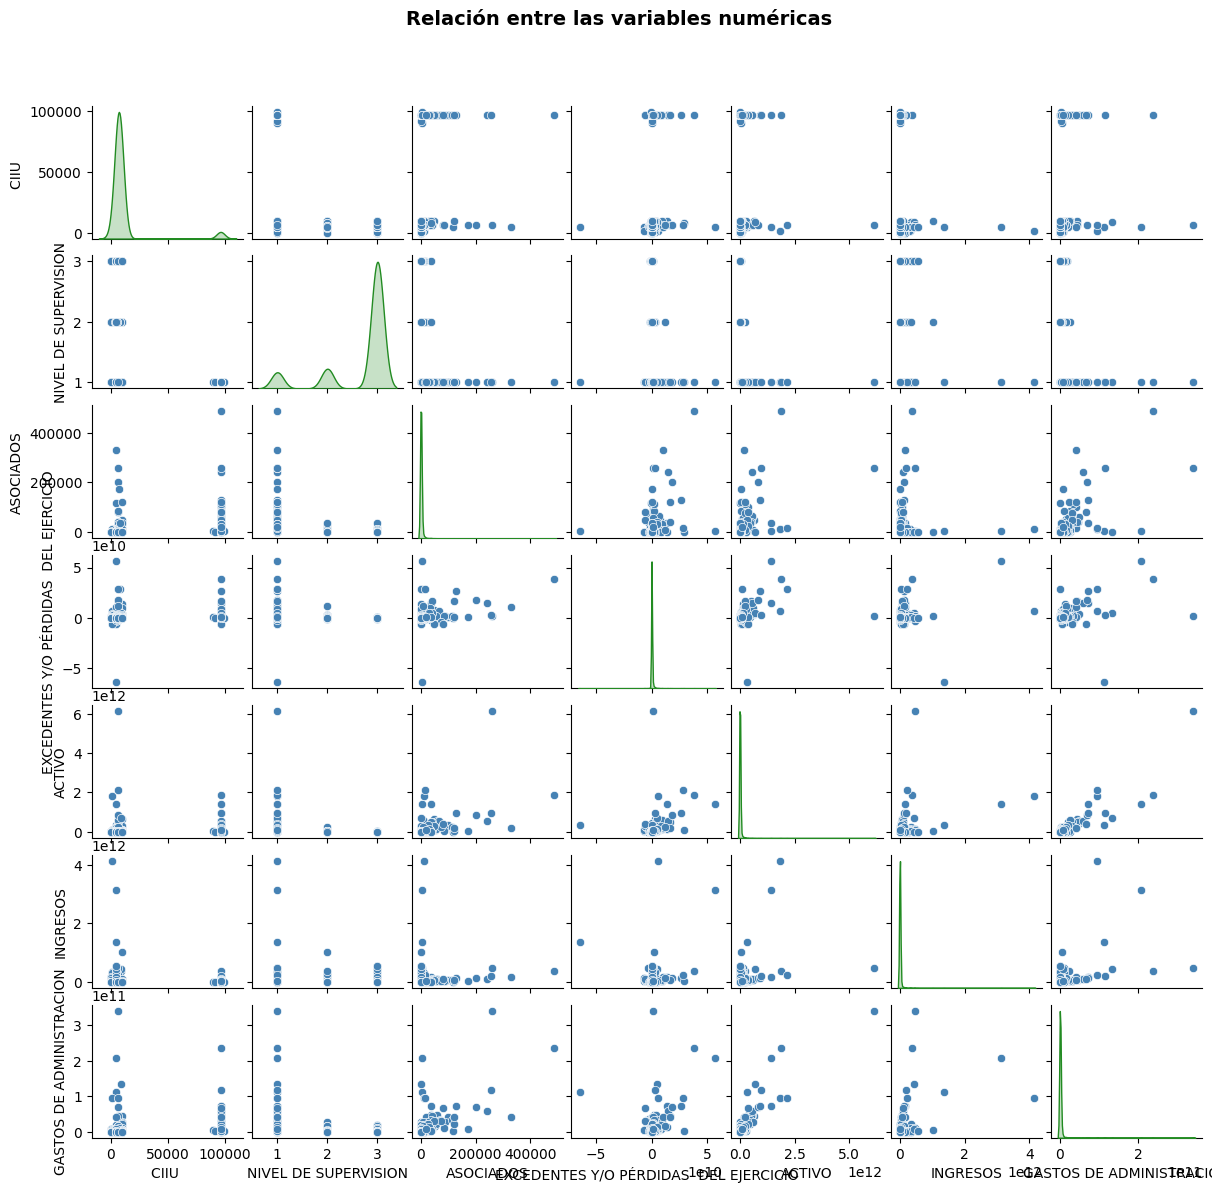

In [14]:
multiple_plot(1, clean_data , num_vars, None, 'scatterplot', 'Relación entre las variables numéricas',30)

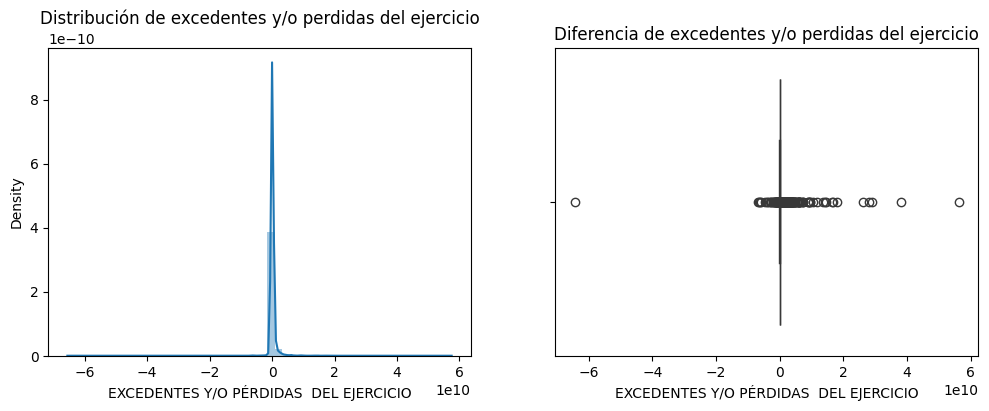

In [15]:
# Variable de salida

#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de excedentes y/o perdidas del ejercicio')
sns.distplot(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'])

plt.subplot(1,2,2)
plt.title('Diferencia de excedentes y/o perdidas del ejercicio')
sns.boxplot(x=clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'], palette='nipy_spectral')

plt.show()

In [16]:
#Descripción de excedentes y/o perdidas del ejercicio: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count           3738
mean       228760096
std       1990630794
min     -64396180055
25%          1102680
50%         11982763
75%         79336646
85%        214577742
90%        419403961
95%       1012414986
97.5%     2071493746
100%     56360392186
max      56360392186
Name: EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO, dtype: float64


In [17]:
# Valores atipicos variable de salida

#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'], 25, interpolation = 'midpoint')
Q3 = np.percentile(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')

Valor atípico leve inferior:-116167009.00249998
Valor atípico leve superior:196560301.6975


In [18]:
# Se eliminan los valores atípicos
clean_data = clean_data.drop(clean_data[clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO']>VASup].index)
clean_data = clean_data.drop(clean_data[clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO']<VAInf].index)
#Reiniciar el indice
clean_data.reset_index(drop=True, inplace=True)

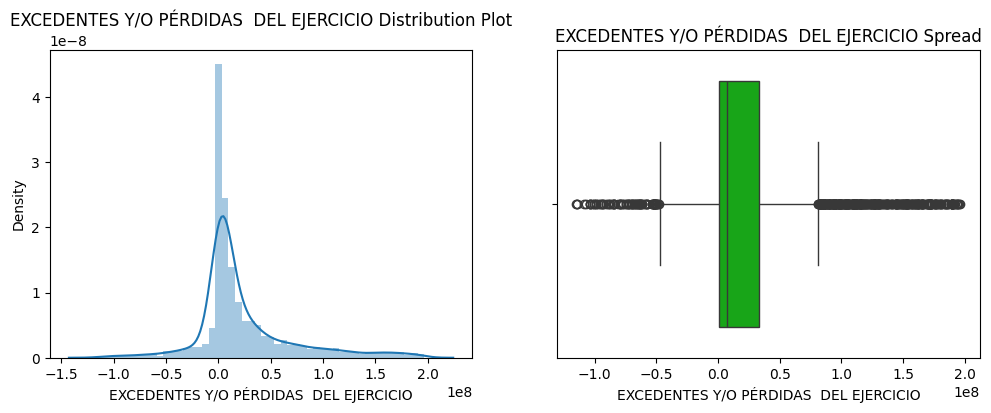

In [19]:
#Histograma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO Distribution Plot')
sns.distplot(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'])

plt.subplot(1,2,2)
plt.title('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO Spread')
sns.boxplot(x=clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'], palette='nipy_spectral')

plt.show()

In [20]:
print(clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count         3055
mean      23065106
std       46233506
min     -114959122
25%         814640
50%        7105565
75%       32935262
85%       62376382
90%       87776666
95%      127037529
97.5%    160476024
100%     196480380
max      196480380
Name: EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO, dtype: float64


In [21]:
# Valores atipicos para variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(clean_data[num_vars])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', clean_data[outliers].index.tolist())


Indices de valores atípicos:  [10, 11, 15, 26, 47, 92, 101, 162, 164, 165, 169, 179, 199, 209, 239, 313, 314, 319, 344, 349, 379, 382, 383, 386, 400, 403, 420, 428, 429, 450, 461, 462, 470, 471, 474, 478, 479, 494, 512, 517, 523, 526, 537, 554, 580, 609, 617, 623, 641, 646, 652, 670, 672, 701, 716, 724, 730, 746, 763, 777, 778, 782, 783, 791, 800, 811, 813, 818, 821, 825, 829, 839, 885, 894, 903, 923, 961, 975, 985, 989, 1001, 1005, 1011, 1019, 1033, 1040, 1043, 1044, 1045, 1047, 1086, 1087, 1102, 1127, 1137, 1139, 1162, 1163, 1186, 1192, 1225, 1227, 1231, 1238, 1253, 1260, 1266, 1269, 1270, 1281, 1285, 1287, 1289, 1290, 1293, 1295, 1312, 1315, 1323, 1325, 1332, 1346, 1352, 1396, 1399, 1401, 1407, 1429, 1436, 1439, 1444, 1448, 1455, 1474, 1483, 1491, 1521, 1525, 1538, 1553, 1554, 1584, 1603, 1632, 1635, 1638, 1658, 1667, 1682, 1687, 1723, 1743, 1746, 1752, 1754, 1768, 1773, 1792, 1805, 1809, 1811, 1833, 1858, 1860, 1864, 1865, 1871, 1875, 1889, 1898, 1910, 1916, 1922, 1927, 1931, 1932,

In [22]:
# Eliminar los valores atípicos del dataframe original
if len(outliers) == len(clean_data):
    clean_data = clean_data.loc[~outliers]
else:
    print("El vector outliers no coincide con el número de filas de clean_data.")

Transformaciones

In [23]:
# Distribución de cada variable categórica en el conjunto de datos

for col in cat_vars:
    print("="*5 + f" {col} " + "="*20)
    print(clean_data[col].value_counts())
    print()

===== TIPO ENTIDAD ====================
TIPO ENTIDAD
Fondos de empleados                        1141
Multiactiva sin seccion de ahorro           816
Cooperativas de trabajo asociado            262
Especializada sin seccion de ahorro         217
Asociaciones mutuales                        99
Integral sin seccion de ahorro               76
Aportes y credito                            31
Especializada de ahorro y credito            28
Otras organizaciones                         20
Instituciones auxiliares especializadas      18
Organismo de representacion                  16
Precooperativas                              11
Administraciones publicas cooperativas        7
Multiactiva con ahorro y credito              6
Fondo de empleados                            1
Name: count, dtype: int64

===== ACTIVIDAD ECONOMICA  ====================
ACTIVIDAD ECONOMICA 
Servicios de ahorro y credito               1145
Otras actividades                            634
Servicios de credito             

In [24]:
# Diccionario con los reemplazos a realizar
reemplazos_te = {"Fondo de empleados": "Fondos de empleados"}

# Todos los que tengan menos de 10 observaciones fueron asignados a "Otras actividades"

reemplazos_ae = {"Vigilancia y seguridad": "Otras actividades"
              ,"Inmobiliarias y de alquiler": "Otras actividades"
              , "Transporte": "Otras actividades"
              , "Pesca": "Otras actividades"
              , "Comunicaciones": "Otras actividades"
              , "Turismo": "Otras actividades"
              , "Hoteles, restaurantes, bares y similares": "Otras actividades"
              , "Silvicultura": "Otras actividades"
              , "Seguros": "Otras actividades"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
clean_data['ACTIVIDAD ECONOMICA '] = clean_data['ACTIVIDAD ECONOMICA '].map(reemplazos_ae).fillna(clean_data['ACTIVIDAD ECONOMICA '])
clean_data['TIPO ENTIDAD'] = clean_data['TIPO ENTIDAD'].map(reemplazos_te).fillna(clean_data['TIPO ENTIDAD'])

#Visualización de las nuevos valores agrupados para las categorias 'ACTIVIDAD ECONOMICA ' y 'TIPO ENTIDAD'
print(clean_data['ACTIVIDAD ECONOMICA '].value_counts().sort_values(ascending=False))
print(clean_data['TIPO ENTIDAD'].value_counts().sort_values(ascending=False))

ACTIVIDAD ECONOMICA 
Servicios de ahorro y credito     1145
Otras actividades                  661
Servicios de credito               488
Agricola                           120
Consumo (comercio)                  71
Obras publicas                      60
Aseo mantenimiento y reciclaje      48
Educacion                           45
Intermediacion financiera           34
Servicios funerarios                16
Mineria                             14
Pecuaria                            13
Organismos de representacion        12
Salud                               12
Industria                           10
Name: count, dtype: int64
TIPO ENTIDAD
Fondos de empleados                        1142
Multiactiva sin seccion de ahorro           816
Cooperativas de trabajo asociado            262
Especializada sin seccion de ahorro         217
Asociaciones mutuales                        99
Integral sin seccion de ahorro               76
Aportes y credito                            31
Especializada de ah

In [25]:
# Excluimos las observaciones donde la variable objetivo sea igual a 0
clean_data = clean_data[clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] != 0]

# Creamos la variable binaria
clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] = np.where(
    clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] > 0, 1, 0
)


In [26]:
clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
1    2340
0     298
Name: count, dtype: int64

In [27]:
# Balancear mi variable de salida

# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(clean_data.drop('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', axis=1), clean_data['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns = clean_data.columns.drop('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
balanced_clean_balanced = pd.concat([df1, df2], axis=1)

In [28]:
balanced_clean_balanced['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
0    2340
1    2340
Name: count, dtype: int64

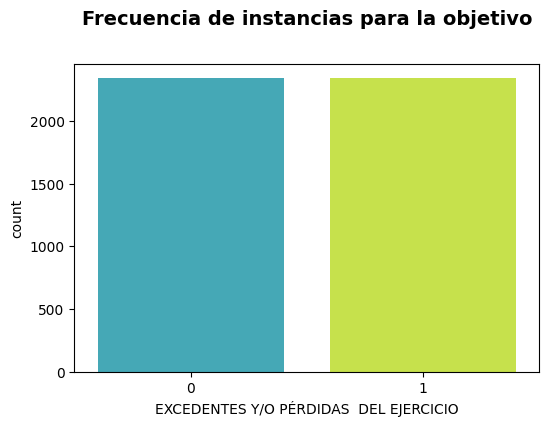

In [29]:
multiple_plot(1, balanced_clean_balanced , None, 'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'countplot', 'Frecuencia de instancias para la objetivo',0)

In [34]:
# Aplicacion de Label Encoding para variables categoricas ya que las dummies nos multiplican el tamaño del dataset

data_encoded = balanced_clean_balanced.copy()

for col in cat_vars:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))

data_encoded[cat_vars]

,TIPO ENTIDAD,ACTIVIDAD ECONOMICA,DEPARTAMENTO,MUNICIPIO
0,10,9,5,32
1,6,12,5,32
2,10,13,5,32
3,10,13,14,330
4,6,12,5,32
...,...,...,...,...
4675,6,12,6,50
4676,10,9,21,323
4677,6,12,30,199
4678,1,9,5,32


In [35]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TIPO ENTIDAD                            4680 non-null   int64  
 1   CIIU                                    4680 non-null   float64
 2   ACTIVIDAD ECONOMICA                     4680 non-null   int64  
 3   DEPARTAMENTO                            4680 non-null   int64  
 4   MUNICIPIO                               4680 non-null   int64  
 5   NIVEL DE SUPERVISION                    4680 non-null   float64
 6   ASOCIADOS                               4680 non-null   float64
 7   ACTIVO                                  4680 non-null   float64
 8   INGRESOS                                4680 non-null   float64
 9   GASTOS DE ADMINISTRACION                4680 non-null   float64
 10  EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO  4680 non-null   int6

# Creacion del modelo

In [40]:
# Lista con todas las variables de entrada

v_entrada = list(data_encoded.columns)
v_entrada.remove('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO')

#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = data_encoded.drop(columns ='EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO')
y = data_encoded['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO']


In [41]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [44]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test[num_vars].head(2)

,CIIU,NIVEL DE SUPERVISION,ASOCIADOS,ACTIVO,INGRESOS,GASTOS DE ADMINISTRACION
2613,0.0662,1.0000,0.0047,0.0181,0.0005,0.0064
3445,0.0695,1.0000,0.0017,0.0221,0.0008,0.0174


In [45]:
X_test

,TIPO ENTIDAD,CIIU,ACTIVIDAD ECONOMICA,DEPARTAMENTO,MUNICIPIO,NIVEL DE SUPERVISION,ASOCIADOS,ACTIVO,INGRESOS,GASTOS DE ADMINISTRACION
2613,6,0.0662,12,5,32,1.0000,0.0047,0.0181,0.0005,0.0064
3445,8,0.0695,9,14,92,1.0000,0.0017,0.0221,0.0008,0.0174
1962,3,0.0974,13,5,32,1.0000,0.0142,0.0498,0.0014,0.0280
4377,6,0.0662,12,5,32,1.0000,0.0018,0.0053,0.0011,0.0058
2605,12,0.0468,0,29,165,1.0000,0.0047,0.0042,0.0941,0.0025
...,...,...,...,...,...,...,...,...,...,...
872,10,0.0662,13,11,213,1.0000,0.0019,0.0091,0.0004,0.0117
1905,6,0.0662,12,30,328,1.0000,0.0215,0.0980,0.0023,0.0260
1035,5,0.0662,13,12,311,1.0000,0.0362,0.0372,0.0035,0.0556
2496,1,0.0974,9,30,44,1.0000,0.0005,0.0002,0.0000,0.0000


In [46]:
#Creación del modelo

modelLRovrLinea = LogisticRegression(multi_class = "ovr"
                                     , solver='liblinear'
                                     , class_weight = 'balanced'
                                     , penalty='l2'
                                     , random_state=0)

modelLRovrlbfgs = LogisticRegression(multi_class = "ovr"
                                     , solver='lbfgs'
                                     , class_weight = 'balanced'
                                     , penalty='l2'
                                     , random_state=0)


modelLRMullbfgs = LogisticRegression(multi_class = "multinomial"
                                     , solver='lbfgs'
                                     , class_weight = 'balanced'
                                     , penalty='l2'
                                     , random_state=0)

#Entrenamiento del modelo con 80% de training

modelLRovrLinea.fit(X_train, y_train)
modelLRovrlbfgs.fit(X_train, y_train)
modelLRMullbfgs.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


# Evaluacion del modelo

In [47]:
# Se realiza la predicción de cada uno de los modelos creados utilizando los datos prueba
y_predovrLinea = modelLRovrLinea.predict(X_test)
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)
y_predMullbfgs = modelLRMullbfgs.predict(X_test)

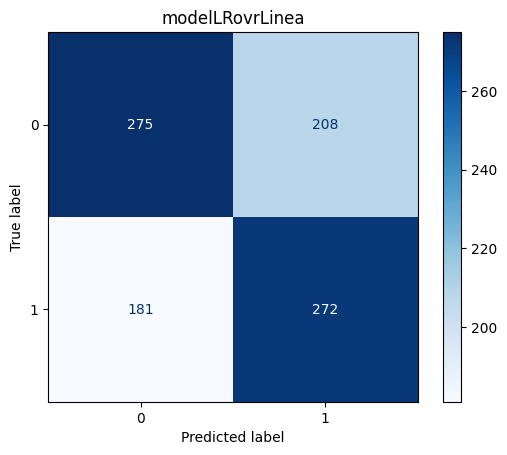

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       483
           1       0.57      0.60      0.58       453

    accuracy                           0.58       936
   macro avg       0.58      0.58      0.58       936
weighted avg       0.59      0.58      0.58       936



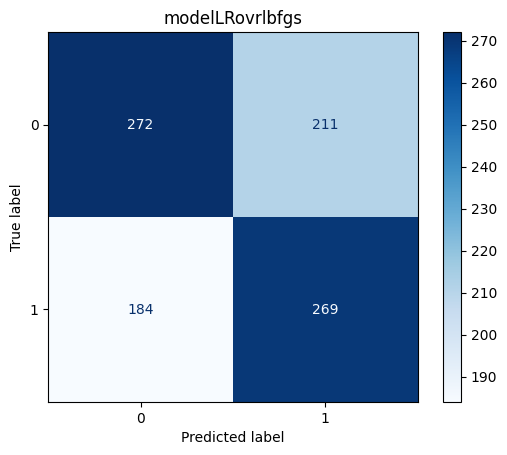

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       483
           1       0.56      0.59      0.58       453

    accuracy                           0.58       936
   macro avg       0.58      0.58      0.58       936
weighted avg       0.58      0.58      0.58       936



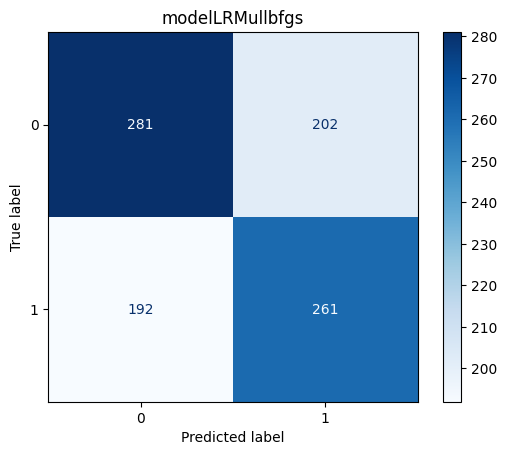

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       483
           1       0.56      0.58      0.57       453

    accuracy                           0.58       936
   macro avg       0.58      0.58      0.58       936
weighted avg       0.58      0.58      0.58       936



In [48]:
# Crear un diccionario de modelos
models = {
    'modelLRovrLinea': [modelLRovrLinea, y_predovrLinea],
    'modelLRovrlbfgs': [modelLRovrlbfgs, y_predovrlbfgs],
    'modelLRMullbfgs': [modelLRMullbfgs, y_predMullbfgs]
}

# Para cada modelo se se extrae un elemento del diccionario models
for model_name, (model, y_pred) in models.items():

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear la visualización de la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

    # Mostrar la visualización
    disp.plot(cmap='Blues')

    # Mostrar el título usando matplotlib
    plt.title(model_name)

    # Mostrar la figura
    plt.show()

    # Mostrar el informe de clasificación
    print(classification_report(y_test, y_pred))

#### ROC - Receiver Operating Characteristic

AUC: 0.64


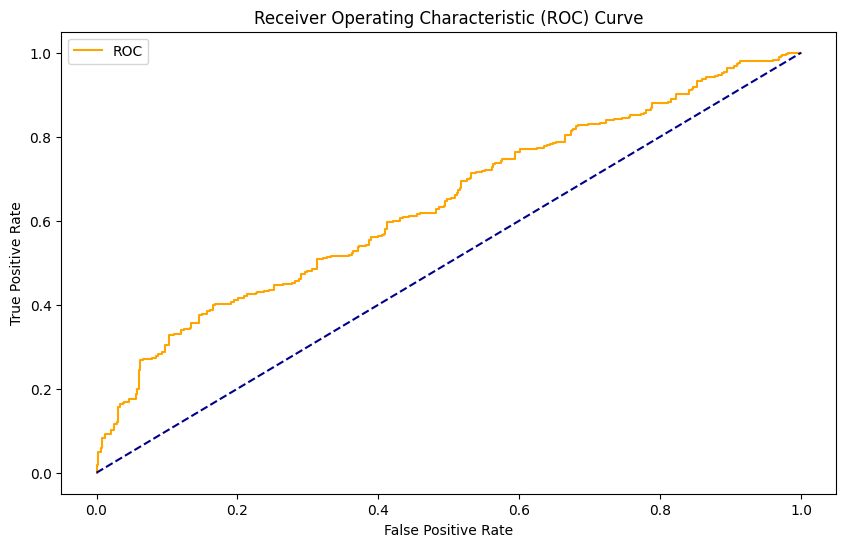

In [51]:
#Curva ROC para un modelo

fig = plt.figure(figsize=(10,6))

# Predecir las probabilidades de la clase positiva usando el modelo de regresión logística entrenado
probs = modelLRovrLinea.predict_proba(X_test)

# Tomar las probabilidades de la clase positiva solamente
probs = probs[:, 1]

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, probs*(1))

# Imprimir el valor del AUC
print('AUC: %.2f' % auc)

# Calcular la curva ROC usando los valores verdaderos y las probabilidades predichas
fpr, tpr, thresholds = roc_curve(y_test, probs*(1))

# Graficar la curva ROC
plot_roc_curve(fpr, tpr)


##Nota: es necesario que la variable de salida sea numérica, sino debe transformarse